In [3]:
import googlemaps
import numpy as np
import pandas as pd
import pickle
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df=pd.read_csv('brooklyn_violations.csv')

In [5]:
df.head(10)

,Summons Number,Issue Date,Violation Code,Violation Location,Violation Precinct,Violation Time,House Number,Street Name,Intersecting Street,City & State
0,8678224277,1/14/2019,14,83,83,1200P,W,St Nicholas Ave,07ft N/of Jefferson,"Brooklyn, NY"
1,8678223868,1/11/2019,21,90,90,1129A,N,Wythe Ave,08ft W/of Rutledge S,"Brooklyn, NY"
2,8699568241,1/13/2019,50,79,79,0305P,S,Macon St,0ft E/of Arlington P,"Brooklyn, NY"
3,8701817176,1/11/2019,50,90,90,0837A,N,S 1st St,0ft E/of Driggs Ave,"Brooklyn, NY"
4,8695487570,1/14/2019,50,90,90,1237P,S,Debevoise St,0ft E/of Graham Ave,"Brooklyn, NY"
5,8715522556,1/12/2019,50,81,81,0652A,S,Jefferson Ave,0ft E/of Howard Ave,"Brooklyn, NY"
6,8598239392,1/12/2019,50,79,79,0333P,N,Fulton St,0ft E/of Kingston Av,"Brooklyn, NY"
7,8582151032,1/12/2019,50,81,81,0842A,S,Pulaski St,0ft E/of Marcus Garv,"Brooklyn, NY"
8,8611202790,1/11/2019,50,90,90,0331P,S,Rutledge St,0ft E/of Marcy Ave,"Brooklyn, NY"
9,8689805205,1/14/2019,50,90,90,0239P,S,Harrison Ave,0ft E/of Middleton S,"Brooklyn, NY"


### Converting time to hr:min format

In [6]:
def str2time(s):
    try:
        hrs = int(s[0:2])
        mins = int(s[2:4])
        ampm = s[4]
        if ampm.upper() == 'P' and hrs != 12:
            hrs += 12
        return dt.time(hrs, mins)
    except:
        return np.nan

In [7]:
df['Violation Time'] = df['Violation Time'].apply(str2time)

In [8]:
df.head(10)

,Summons Number,Issue Date,Violation Code,Violation Location,Violation Precinct,Violation Time,House Number,Street Name,Intersecting Street,City & State
0,8678224277,1/14/2019,14,83,83,12:00:00,W,St Nicholas Ave,07ft N/of Jefferson,"Brooklyn, NY"
1,8678223868,1/11/2019,21,90,90,11:29:00,N,Wythe Ave,08ft W/of Rutledge S,"Brooklyn, NY"
2,8699568241,1/13/2019,50,79,79,15:05:00,S,Macon St,0ft E/of Arlington P,"Brooklyn, NY"
3,8701817176,1/11/2019,50,90,90,08:37:00,N,S 1st St,0ft E/of Driggs Ave,"Brooklyn, NY"
4,8695487570,1/14/2019,50,90,90,12:37:00,S,Debevoise St,0ft E/of Graham Ave,"Brooklyn, NY"
5,8715522556,1/12/2019,50,81,81,06:52:00,S,Jefferson Ave,0ft E/of Howard Ave,"Brooklyn, NY"
6,8598239392,1/12/2019,50,79,79,15:33:00,N,Fulton St,0ft E/of Kingston Av,"Brooklyn, NY"
7,8582151032,1/12/2019,50,81,81,08:42:00,S,Pulaski St,0ft E/of Marcus Garv,"Brooklyn, NY"
8,8611202790,1/11/2019,50,90,90,15:31:00,S,Rutledge St,0ft E/of Marcy Ave,"Brooklyn, NY"
9,8689805205,1/14/2019,50,90,90,14:39:00,S,Harrison Ave,0ft E/of Middleton S,"Brooklyn, NY"


In [9]:
type(df.iloc[1]['Violation Time'])

datetime.time

### Adding Ticket Cost and Ticket Type 

In [10]:
df['Ticket Cost'] = ''
df['Ticket Type'] = ''
df.head()

,Summons Number,Issue Date,Violation Code,Violation Location,Violation Precinct,Violation Time,House Number,Street Name,Intersecting Street,City & State,Ticket Cost,Ticket Type
0,8678224277,1/14/2019,14,83,83,12:00:00,W,St Nicholas Ave,07ft N/of Jefferson,"Brooklyn, NY",,
1,8678223868,1/11/2019,21,90,90,11:29:00,N,Wythe Ave,08ft W/of Rutledge S,"Brooklyn, NY",,
2,8699568241,1/13/2019,50,79,79,15:05:00,S,Macon St,0ft E/of Arlington P,"Brooklyn, NY",,
3,8701817176,1/11/2019,50,90,90,08:37:00,N,S 1st St,0ft E/of Driggs Ave,"Brooklyn, NY",,
4,8695487570,1/14/2019,50,90,90,12:37:00,S,Debevoise St,0ft E/of Graham Ave,"Brooklyn, NY",,


In [15]:
# source: https://www1.nyc.gov/site/finance/vehicles/services-violation-codes.page
# cleaned data in Excel
violations = pd.read_excel('violation_codes.xlxs')

In [16]:
violations.set_index('CODE', inplace=True)

In [17]:
violations.head()

,DEFINITION,Cost_Outside_Manhattan
CODE,,
4,Vehicles parked illegally south of Houston Str...,115
5,Failure to make a right turn from a bus lane.,115
7,Vehicles photographed going through a red ligh...,50
8,Vehicle idling in a restricted area.,115
9,Blocking an Intersection: Obstructing traffic ...,115


In [18]:
def get_cost(code):
    import warnings
    warnings.filterwarnings('ignore')
    try:
        return int(violations.loc[int(code)]['Cost_Outside_Manhattan'])
    except:
        return np.nan

In [19]:
df['Ticket Cost'] = df['Violation Code'].apply(get_cost)

In [20]:
df

,Summons Number,Issue Date,Violation Code,Violation Location,Violation Precinct,Violation Time,House Number,Street Name,Intersecting Street,City & State,Ticket Cost,Ticket Type
0,8678224277,1/14/2019,14,83,83,12:00:00,W,St Nicholas Ave,07ft N/of Jefferson,"Brooklyn, NY",115.0,
1,8678223868,1/11/2019,21,90,90,11:29:00,N,Wythe Ave,08ft W/of Rutledge S,"Brooklyn, NY",45.0,
2,8699568241,1/13/2019,50,79,79,15:05:00,S,Macon St,0ft E/of Arlington P,"Brooklyn, NY",115.0,
3,8701817176,1/11/2019,50,90,90,08:37:00,N,S 1st St,0ft E/of Driggs Ave,"Brooklyn, NY",115.0,
4,8695487570,1/14/2019,50,90,90,12:37:00,S,Debevoise St,0ft E/of Graham Ave,"Brooklyn, NY",115.0,
5,8715522556,1/12/2019,50,81,81,06:52:00,S,Jefferson Ave,0ft E/of Howard Ave,"Brooklyn, NY",115.0,
6,8598239392,1/12/2019,50,79,79,15:33:00,N,Fulton St,0ft E/of Kingston Av,"Brooklyn, NY",115.0,
7,8582151032,1/12/2019,50,81,81,08:42:00,S,Pulaski St,0ft E/of Marcus Garv,"Brooklyn, NY",115.0,
8,8611202790,1/11/2019,50,90,90,15:31:00,S,Rutledge St,0ft E/of Marcy Ave,"Brooklyn, NY",115.0,
9,8689805205,1/14/2019,50,90,90,14:39:00,S,Harrison Ave,0ft E/of Middleton S,"Brooklyn, NY",115.0,


In [21]:
def get_type(code):
    import warnings
    warnings.filterwarnings('ignore')
    try:
        return violations.loc[int(code)]['DEFINITION']
    except:
        return np.nan

In [22]:
df['Ticket Type'] = df['Violation Code'].apply(get_type)

In [23]:
df.head()

,Summons Number,Issue Date,Violation Code,Violation Location,Violation Precinct,Violation Time,House Number,Street Name,Intersecting Street,City & State,Ticket Cost,Ticket Type
0,8678224277,1/14/2019,14,83,83,12:00:00,W,St Nicholas Ave,07ft N/of Jefferson,"Brooklyn, NY",115.0,General No Standing: Standing or parking where...
1,8678223868,1/11/2019,21,90,90,11:29:00,N,Wythe Ave,08ft W/of Rutledge S,"Brooklyn, NY",45.0,Street Cleaning: No parking where parking is n...
2,8699568241,1/13/2019,50,79,79,15:05:00,S,Macon St,0ft E/of Arlington P,"Brooklyn, NY",115.0,"Stopping, standing or parking in a crosswalk. ..."
3,8701817176,1/11/2019,50,90,90,08:37:00,N,S 1st St,0ft E/of Driggs Ave,"Brooklyn, NY",115.0,"Stopping, standing or parking in a crosswalk. ..."
4,8695487570,1/14/2019,50,90,90,12:37:00,S,Debevoise St,0ft E/of Graham Ave,"Brooklyn, NY",115.0,"Stopping, standing or parking in a crosswalk. ..."


In [36]:
df.to_csv('violations_info_full.csv')

### Basic Visualizations
1. Bar graph: # of violations by hour
2. Bar graph: # of violations by ticket cost
3. Bar graph: average ticket cost by precinct

In [24]:
x = df.values
a = x[:,10] #extract 1 column
a

array([115.0, 45.0, 115.0, ..., 60.0, 115.0, 115.0], dtype=object)

In [25]:
# problem - no data is showing up! Is it because the cost is not an integer?

#x = df.values
#a = x[:,10] #extract 1 column
#plt.hist(a, bins=20)
#plt.title('Violations Grouped By Ticket Cost')
#plt.ylabel('Number of Violations')
#plt.xlabel('Ticket Cost')
#plt.show

<function matplotlib.pyplot.show(*args, **kw)>

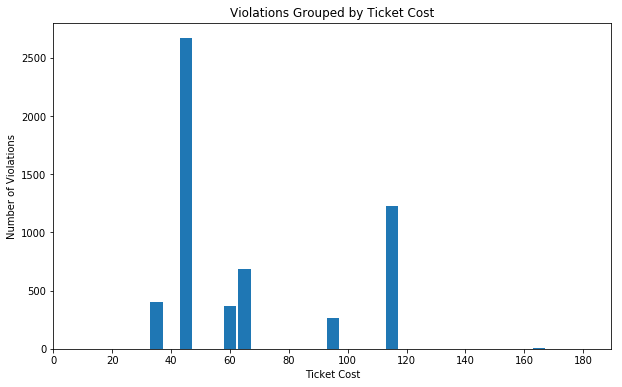

In [26]:
# source: https://stevebottos.github.io/jupnotes/LA%20Parking%20Violations%202018
cost_counts = df.groupby(by = 'Ticket Cost', as_index=False).agg({'Summons Number' : pd.Series.nunique})
cost_counts = cost_counts.astype(float)
cost_counts = cost_counts.sort_values(by = ['Ticket Cost'], ascending = True)

f1 = plt.figure(figsize=(10, 6))
plt.bar(cost_counts['Ticket Cost'], cost_counts['Summons Number'], width=4.3, align='center')
plt.title('Violations Grouped by Ticket Cost')
plt.xlabel('Ticket Cost')
plt.ylabel('Number of Violations')
plt.xticks(ticks=[0,20,40,60,80,100,120,140,160,180])
plt.show

In [27]:
cost_counts

,Ticket Cost,Summons Number
0,35.0,400.0
1,45.0,2669.0
2,60.0,370.0
3,65.0,683.0
4,95.0,262.0
5,115.0,1229.0
6,165.0,6.0
7,180.0,2.0


In [28]:
time_counts = df.groupby(by = 'Violation Time', as_index=False).agg({'Summons Number' : pd.Series.nunique})
time_counts

,Violation Time,Summons Number
0,00:00:00,1
1,00:01:00,1
2,00:08:00,1
3,00:09:00,1
4,00:12:00,1
5,00:13:00,1
6,00:20:00,1
7,00:34:00,1
8,00:37:00,1
9,00:41:00,1


In [29]:
x = time_counts.iloc[1]['Violation Time']
type(x)

datetime.time

In [30]:
x = time_counts.iloc[1]['Violation Time']
y = int(x.hour)
y

0

In [31]:
type(y)

int

In [32]:
def time2int(t):
    if type(t) == dt.time:
        return int(t.hour)
    else:
        return np.nan

In [33]:
time_counts['Violation Time'] = df['Violation Time'].apply(time2int)

In [34]:
time_counts

,Violation Time,Summons Number
0,12,1
1,11,1
2,15,1
3,8,1
4,12,1
5,6,1
6,15,1
7,8,1
8,15,1
9,14,1


<function matplotlib.pyplot.show(*args, **kw)>

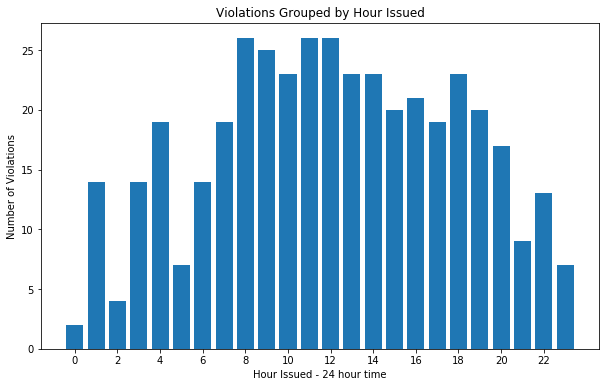

In [44]:
time_counts = time_counts.astype(float)
time_counts = time_counts.sort_values(by = ['Violation Time'], ascending = True)

f1 = plt.figure(figsize=(10, 6))
plt.bar(time_counts['Violation Time'], time_counts['Summons Number'], width=0.8)
plt.title('Violations Grouped by Hour Issued')
plt.xlabel('Hour Issued - 24 hour time')
plt.ylabel('Number of Violations')
plt.xticks(ticks=[0,2,4,6,8,10,12,14,16,18,20,22])
plt.show